In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score
)

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


#from pycaret.classification import *
#%matplotlib inline

In [24]:
data = pd.read_csv('/content/drive/MyDrive/제조데이터해커톤/final_data2.csv')

In [25]:
data.head()

,No_Shot,Machine_Cycle_Time,Cycle_Time,Barrel_Temp_Z1,Barrel_Temp_Z2,Barrel_Temp_Z3,Barrel_Temp_Z4,Hopper_Temp,Injection_Pressure_Real_Time,Screw_Position,Injection_Peak_Press,Max_Injection_Rate,Screw_Velocity,VP_Time,VP_Position,VP_Press,Plasticizing_Time,Plasticizing_Start_Position,Plasticizing_End_Position,Plasticizing_RPM,Cooling_Time,Back_Flow,Decompression_Time,Lot,label
0,0,16.54,16.52,210.2,200.7,193.5,187.3,40.1,1.23,6.02,1211.65,78.37,20.60,2.0,8.14,1062.00,4.74,10.46,63.11,28.27,8.0,49.03,0.32,0,False
1,1,16.56,16.54,210.2,200.8,193.5,187.2,40.2,1.24,6.02,1211.65,78.37,20.60,2.0,8.14,1062.00,4.81,10.49,63.11,28.27,8.0,49.03,0.32,0,False
2,2,16.58,16.56,210.1,200.7,193.5,187.2,40.2,1.26,6.02,1209.16,78.32,35.38,2.0,8.12,1101.41,4.80,10.53,63.11,28.27,8.0,49.03,0.32,0,False
3,3,16.62,16.58,210.1,200.6,193.5,187.2,40.2,1.30,6.28,1228.24,78.19,36.35,2.0,8.12,1092.55,4.84,10.78,63.11,28.27,8.0,49.03,0.33,0,False
4,4,16.62,16.62,210.0,200.5,193.4,187.3,40.1,1.31,6.46,1287.11,77.99,46.10,2.0,8.10,1153.41,4.86,10.94,63.11,28.27,8.0,49.03,0.33,0,False


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030414 entries, 0 to 1030413
Data columns (total 25 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   No_Shot                       1030414 non-null  int64  
 1   Machine_Cycle_Time            1030414 non-null  float64
 2   Cycle_Time                    1030414 non-null  float64
 3   Barrel_Temp_Z1                1030414 non-null  float64
 4   Barrel_Temp_Z2                1030414 non-null  float64
 5   Barrel_Temp_Z3                1030414 non-null  float64
 6   Barrel_Temp_Z4                1030414 non-null  float64
 7   Hopper_Temp                   1030414 non-null  float64
 8   Injection_Pressure_Real_Time  1030414 non-null  float64
 9   Screw_Position                1030414 non-null  float64
 10  Injection_Peak_Press          1030414 non-null  float64
 11  Max_Injection_Rate            1030414 non-null  float64
 12  Screw_Velocity              

In [27]:
data.describe()

,No_Shot,Machine_Cycle_Time,Cycle_Time,Barrel_Temp_Z1,Barrel_Temp_Z2,Barrel_Temp_Z3,Barrel_Temp_Z4,Hopper_Temp,Injection_Pressure_Real_Time,Screw_Position,Injection_Peak_Press,Max_Injection_Rate,Screw_Velocity,VP_Time,VP_Position,VP_Press,Plasticizing_Time,Plasticizing_Start_Position,Plasticizing_End_Position,Plasticizing_RPM,Cooling_Time,Back_Flow,Decompression_Time,Lot
count,1.030414e+06,1.030414e+06,1.030414e+06,1.030414e+06,1.030414e+06,1.030414e+06,1.030414e+06,1.030414e+06,1.030414e+06,1.030414e+06,1.030414e+06,1.030414e+06,1.030414e+06,1.030414e+06,1.030414e+06,1.030414e+06,1.030414e+06,1.030414e+06,1.030414e+06,1.030414e+06,1.030414e+06,1.030414e+06,1.030414e+06,1.030414e+06
mean,1.421164e+03,1.529238e+01,1.530605e+01,2.153295e+02,2.058233e+02,2.008239e+02,1.954887e+02,4.405854e+01,9.587763e-01,8.077188e+00,1.024797e+03,5.931422e+01,3.285871e+01,1.139302e+00,9.126579e+00,9.779145e+02,3.798478e+00,1.137242e+01,4.759301e+01,2.890215e+01,8.106208e+00,5.886969e+01,3.239642e-01,1.978192e+02
std,9.569372e+02,1.921695e+00,1.926272e+00,2.167523e+01,1.803171e+01,1.685299e+01,1.567359e+01,6.194939e+00,2.214509e-01,1.689075e+00,1.305721e+02,9.940894e+00,1.162682e+01,3.602643e-01,1.416521e+00,1.159654e+02,1.252799e+00,1.777226e+00,1.458627e+01,7.537388e+00,1.279895e+00,2.290494e+01,4.222583e-02,1.070763e+02
min,0.000000e+00,1.112000e+01,1.112000e+01,1.300000e+01,1.290000e+01,1.280000e+01,1.270000e+01,1.210000e+01,0.000000e+00,-3.000000e-02,2.111500e+02,1.105000e+01,-4.000000e-02,0.000000e+00,4.230000e+00,1.040000e+00,0.000000e+00,1.100000e-01,2.544000e+01,1.131000e+01,6.000000e+00,9.810000e+00,1.700000e-01,0.000000e+00
25%,6.570000e+02,1.448000e+01,1.448000e+01,2.050000e+02,2.000000e+02,1.949000e+02,1.900000e+02,4.000000e+01,7.800000e-01,6.670000e+00,9.154600e+02,5.062000e+01,2.554000e+01,1.000000e+00,8.130000e+00,8.652000e+02,2.500000e+00,1.065000e+01,3.054000e+01,2.262000e+01,8.000000e+00,4.903000e+01,2.900000e-01,1.100000e+02
50%,1.348000e+03,1.460000e+01,1.462000e+01,2.100000e+02,2.001000e+02,1.951000e+02,1.901000e+02,4.030000e+01,1.020000e+00,8.040000e+00,1.038960e+03,6.225000e+01,3.672000e+01,1.000000e+00,9.140000e+00,9.990300e+02,4.060000e+00,1.100000e+01,5.700000e+01,2.827000e+01,8.000000e+00,4.903000e+01,3.200000e-01,2.010000e+02
75%,2.084000e+03,1.598000e+01,1.600000e+01,2.150000e+02,2.001000e+02,1.999000e+02,1.949000e+02,4.930000e+01,1.050000e+00,8.990000e+00,1.077010e+03,6.277000e+01,4.316000e+01,1.000000e+00,1.015000e+01,1.044820e+03,4.830000e+00,1.251000e+01,6.006000e+01,3.393000e+01,8.000000e+00,7.845000e+01,3.300000e-01,2.860000e+02
max,9.177000e+03,3.452000e+01,6.074000e+01,2.963000e+02,2.717000e+02,2.619000e+02,2.518000e+02,6.020000e+01,3.000000e+00,2.782000e+01,1.504600e+03,8.431000e+01,5.924000e+01,9.000000e+00,2.925000e+01,1.390990e+03,2.437000e+01,3.404000e+01,6.313000e+01,4.712000e+01,1.700000e+01,2.942000e+02,5.200000e-01,3.800000e+02


In [28]:
data.columns

Index(['No_Shot', 'Machine_Cycle_Time', 'Cycle_Time', 'Barrel_Temp_Z1',
       'Barrel_Temp_Z2', 'Barrel_Temp_Z3', 'Barrel_Temp_Z4', 'Hopper_Temp',
       'Injection_Pressure_Real_Time', 'Screw_Position',
       'Injection_Peak_Press', 'Max_Injection_Rate', 'Screw_Velocity',
       'VP_Time', 'VP_Position', 'VP_Press', 'Plasticizing_Time',
       'Plasticizing_Start_Position', 'Plasticizing_End_Position',
       'Plasticizing_RPM', 'Cooling_Time', 'Back_Flow', 'Decompression_Time',
       'Lot', 'label'],
      dtype='object')

In [29]:
print('결측치 개수:',data[data.isnull()==True].count().sum())

결측치 개수: 0


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

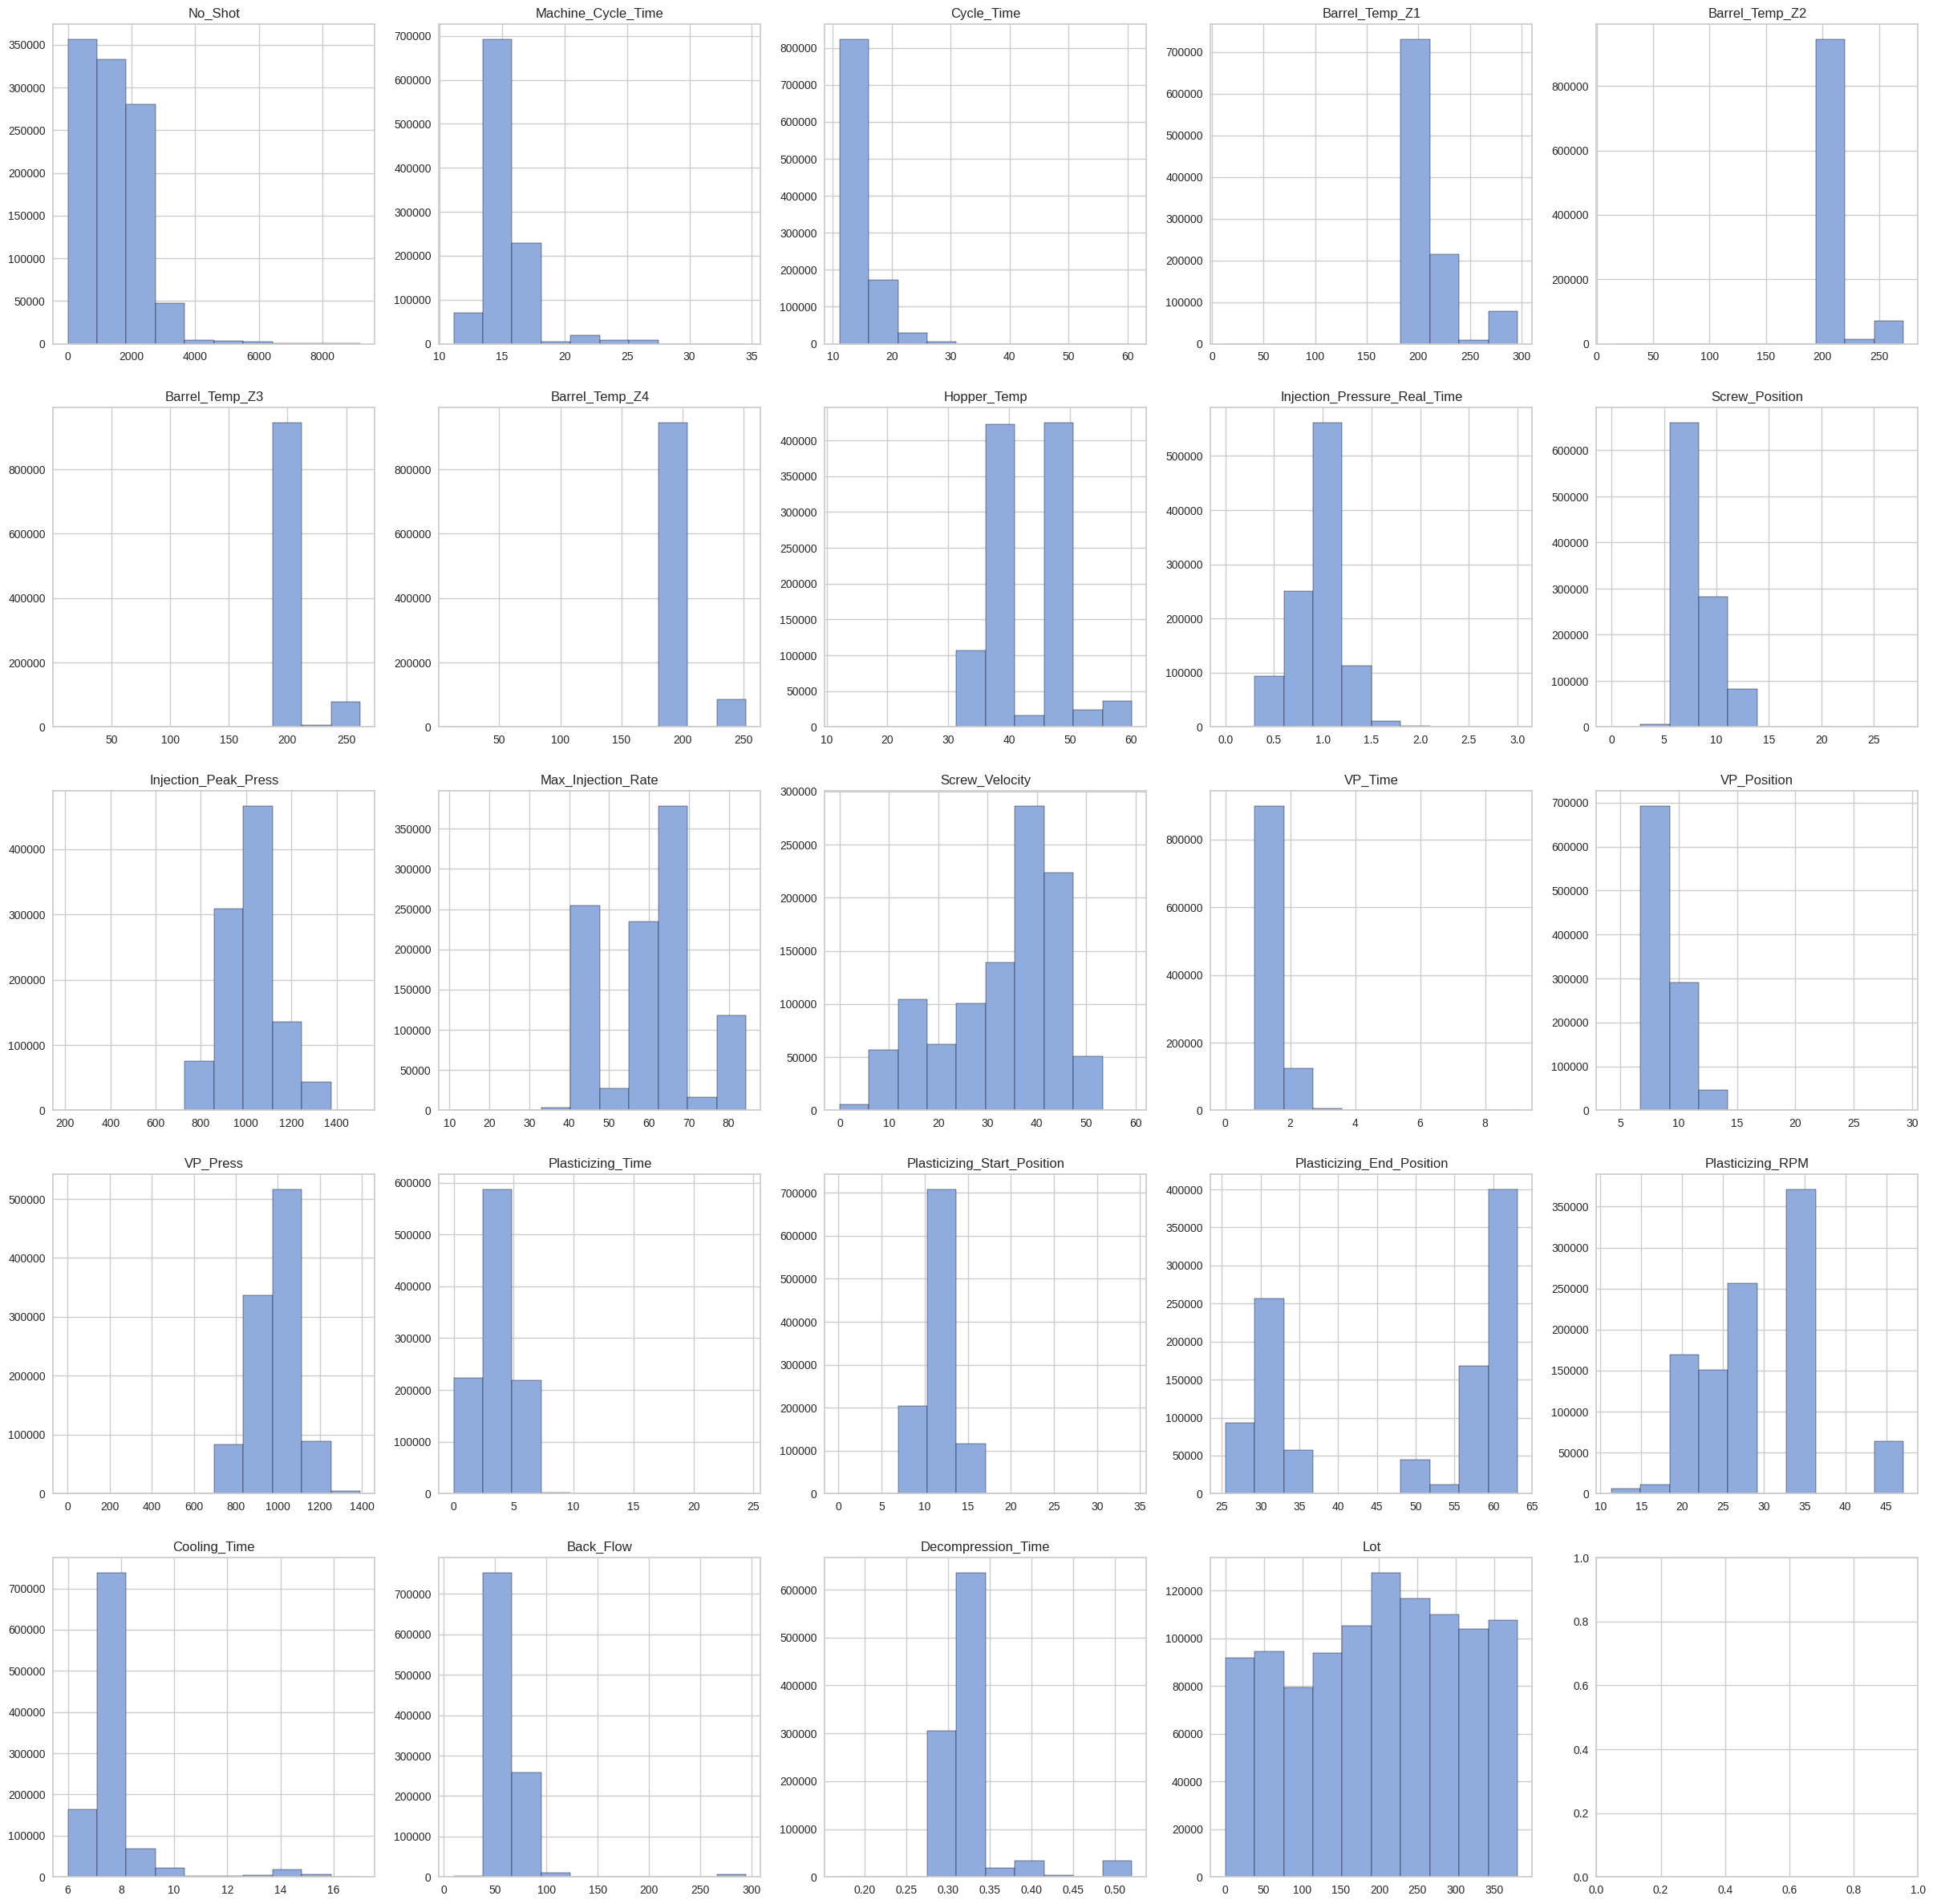

In [30]:
# 히스토그램 시각화
plt.figure(figsize=(30,30))

for index, value in enumerate(data):
  sub = plt.subplot(5,5,index+1)
  sub.hist(data[value], facecolor = (144/255,171/255,221/255), linewidth=.3, edgecolor='black')
  plt.title(value)

<Axes: >

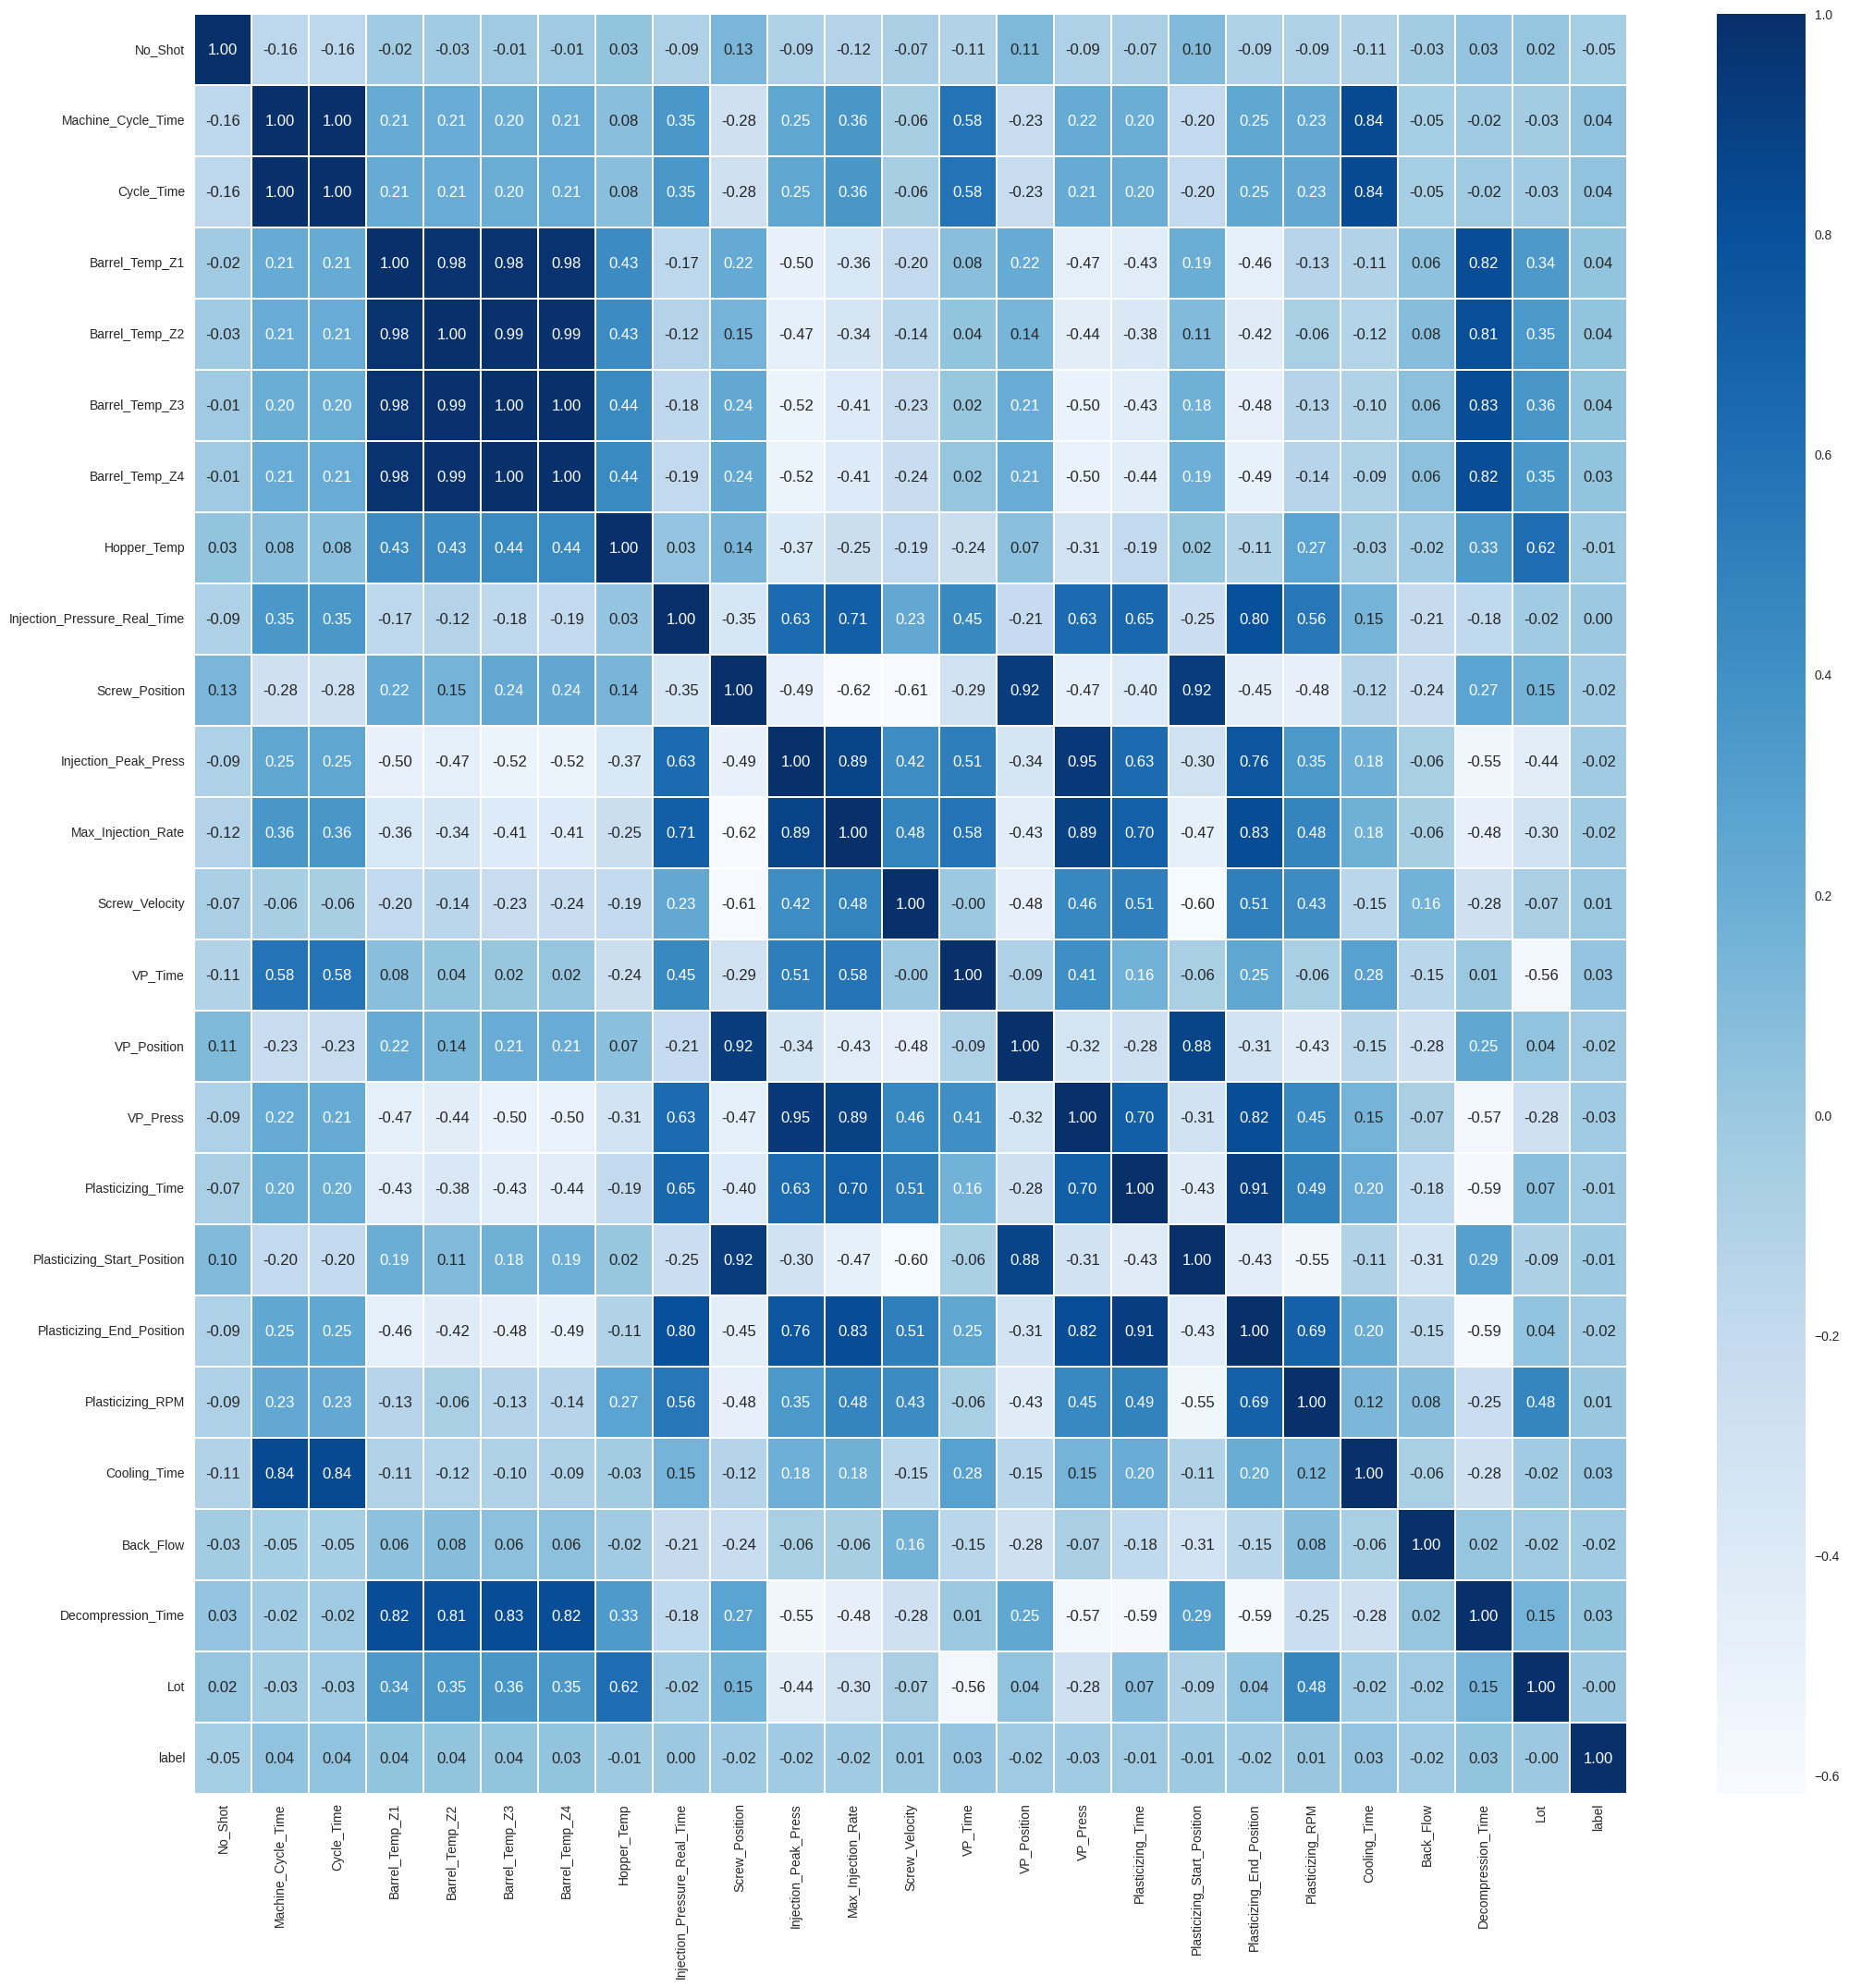

In [31]:
# 상관계수 시각화
plt.subplots(figsize=(25,25))
sns.heatmap(data = data.corr(), linewidths=0.1, annot=True, fmt='.2f', cmap='Blues')

In [32]:
data['label'].value_counts()

label
False    1002137
True       28277
Name: count, dtype: int64

#### Pycaret

In [33]:
import pycaret
from pycaret.classification import *

In [34]:
def fnr_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    fnr = fn / (fn + tp)
    return fnr

In [35]:
data.columns

Index(['No_Shot', 'Machine_Cycle_Time', 'Cycle_Time', 'Barrel_Temp_Z1',
       'Barrel_Temp_Z2', 'Barrel_Temp_Z3', 'Barrel_Temp_Z4', 'Hopper_Temp',
       'Injection_Pressure_Real_Time', 'Screw_Position',
       'Injection_Peak_Press', 'Max_Injection_Rate', 'Screw_Velocity',
       'VP_Time', 'VP_Position', 'VP_Press', 'Plasticizing_Time',
       'Plasticizing_Start_Position', 'Plasticizing_End_Position',
       'Plasticizing_RPM', 'Cooling_Time', 'Back_Flow', 'Decompression_Time',
       'Lot', 'label'],
      dtype='object')

In [18]:
data = data.drop(columns=['No_Shot', 'Lot'])

In [20]:
data.head()

,Machine_Cycle_Time,Cycle_Time,Barrel_Temp_Z1,Barrel_Temp_Z2,Barrel_Temp_Z3,Barrel_Temp_Z4,Hopper_Temp,Injection_Pressure_Real_Time,Screw_Position,Injection_Peak_Press,Max_Injection_Rate,Screw_Velocity,VP_Time,VP_Position,VP_Press,Plasticizing_Time,Plasticizing_Start_Position,Plasticizing_End_Position,Plasticizing_RPM,Cooling_Time,Back_Flow,Decompression_Time,label
0,16.54,16.52,210.2,200.7,193.5,187.3,40.1,1.23,6.02,1211.65,78.37,20.60,2.0,8.14,1062.00,4.74,10.46,63.11,28.27,8.0,49.03,0.32,False
1,16.56,16.54,210.2,200.8,193.5,187.2,40.2,1.24,6.02,1211.65,78.37,20.60,2.0,8.14,1062.00,4.81,10.49,63.11,28.27,8.0,49.03,0.32,False
2,16.58,16.56,210.1,200.7,193.5,187.2,40.2,1.26,6.02,1209.16,78.32,35.38,2.0,8.12,1101.41,4.80,10.53,63.11,28.27,8.0,49.03,0.32,False
3,16.62,16.58,210.1,200.6,193.5,187.2,40.2,1.30,6.28,1228.24,78.19,36.35,2.0,8.12,1092.55,4.84,10.78,63.11,28.27,8.0,49.03,0.33,False
4,16.62,16.62,210.0,200.5,193.4,187.3,40.1,1.31,6.46,1287.11,77.99,46.10,2.0,8.10,1153.41,4.86,10.94,63.11,28.27,8.0,49.03,0.33,False


In [22]:
scaler = MinMaxScaler()


data = scaler.fit_transform(data)

data = pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0.231624,0.108827,0.696082,0.725657,0.725411,0.730238,0.582121,0.410000,0.217235,0.773513,0.918919,0.348178,0.222222,0.156275,0.763308,0.194501,0.305040,0.999469,0.473611,0.181818,0.137909,0.428571,0.0
1,0.232479,0.109230,0.696082,0.726043,0.725411,0.729820,0.584200,0.413333,0.217235,0.773513,0.918919,0.348178,0.222222,0.156275,0.763308,0.197374,0.305924,0.999469,0.473611,0.181818,0.137909,0.428571,0.0
2,0.233333,0.109633,0.695729,0.725657,0.725411,0.729820,0.584200,0.420000,0.217235,0.771588,0.918236,0.597503,0.222222,0.155476,0.791662,0.196963,0.307103,0.999469,0.473611,0.181818,0.137909,0.428571,0.0
3,0.235043,0.110036,0.695729,0.725270,0.725411,0.729820,0.584200,0.433333,0.226571,0.786339,0.916462,0.613866,0.222222,0.155476,0.785287,0.198605,0.314471,0.999469,0.473611,0.181818,0.137909,0.457143,0.0
4,0.235043,0.110842,0.695376,0.724884,0.725010,0.730238,0.582121,0.436667,0.233034,0.831853,0.913732,0.778340,0.222222,0.154676,0.829073,0.199426,0.319187,0.999469,0.473611,0.181818,0.137909,0.457143,0.0


In [36]:
# 데이터 프레임을 PyCaret 형식으로 변환
exp_clf = setup(data = data, target = 'label', session_id = 400)

# 사용자 정의 지표 추가
add_metric(id='fnr', name='False Negative Rate', score_func=fnr_score, greater_is_better=False)

# 모델 비교 및 선택
best_model = compare_models()

,Description,Value
0,Session id,400
1,Target,label
2,Target type,Binary
3,Original data shape,"(1030414, 25)"
4,Transformed data shape,"(1030414, 25)"
5,Transformed train set shape,"(721289, 25)"
6,Transformed test set shape,"(309125, 25)"
7,Numeric features,24
8,Preprocess,True
9,Imputation type,simple


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:14:37
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,False Negative Rate,TT (Sec)
lr,Logistic Regression,0.9725,0.6635,0.0029,0.4906,0.0058,0.0054,0.0349,0.0000,53.3950


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
# 비교할 지표 리스트
metrics = ['Accuracy', 'AUC', 'Recall', 'Precision', 'F1', 'Kappa', 'MCC', 'fnr']

# 각 지표별 최상의 모델을 찾아서 저장
for metric in metrics:
    best_model = compare_models(sort=metric)
    save_model(best_model, f'best_model_{metric}')

print("모든 모델이 저장되었습니다.")